# <font color='blue'>Image denoising using an Ising model</font>

In this assignment, we'll denoise a corrupted image using Bayesian inference with a very simple prior.

### <font color='blue'>Preliminaries</font>

To begin with, you will need to have OpenCV installed (`pip install opencv-python`).

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2
import math

This next routine loads in an image. We will be working with `noisy_bear.png`, which is a corrupted version of `original_bear.png`. The image is 62-by-62; we binarize it (to values -1 and +1) and then embed it in the center of a 64-by-64 image whose edges are padded with zeros.

In [2]:
# Subroutine for loading an image
# Any pixel with value >= 128 is set to +1
# Any pixel with value < 128 is set to -1
def load_image(filename):
  img = cv2.imread(filename,cv2.IMREAD_GRAYSCALE)
  img = img/255.0
  img[img>=0.5]=1.0
  img[img<0.5]=0.0
  img = img*2-1
  return img

# Load in both the degraded image and the original
img = load_image("noisy_bear.png")
gt = load_image("original_bear.png")
M,N = img.shape[0], img.shape[1]

# Create a version of img that is padded with zeros all around
padded_image = np.zeros((img.shape[0]+2, img.shape[1]+2)) #Padding image to make some computations easier 
padded_image[1:-1,1:-1] = img

### <font color='blue'>The probabilistic model</font>

Let $X$ denote the degraded image (of size $M \times N$) and $Y$ the original that we wish to reconstruct (warning: we used the opposite notation in lecture). We will posit a simple probabilistic model of the joint distribution of $(X,Y)$:


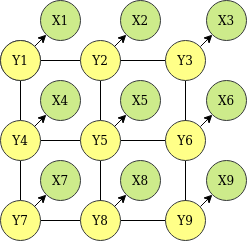


Let $p = (i,j)$ denote a position in the image and let $X_p = X(i,j), Y_p = Y(i,j)$ be the values of $X$ and $Y$ at that location. Recall that these values are -1 or +1. Write $p \sim q$ if $p,q$ are neighboring pixels; note that pixel $p = (i,j)$ has neighbors ${\mathcal{N}}(p) = \{ (i-1,j), (i+1,j), (i,j-1), (i,j+1)\}$. Then the probability of $X,Y$ is:

$$Pr(X,Y) \propto \prod\limits_{p \in [M] \times [N]} \phi(X_{p},Y_{p})\prod\limits_{p \sim q}\phi(Y_p, Y_q) $$ 

Notice that here all clique potentials are identical functions. We will use $\phi(u, v) = e^{uv}$.

### <font color='blue'>Sampling from the posterior</font>

We wish to sample from the <b>posterior distribution over $Y$ given $X$</b>. We'll do this using Gibbs sampling:

* We will initialize the recovered image with each pixel set uniformly to $\{-1,+1\}$
* We will then repeatedly choose a pixel $p$ to update and re-sample its value from $Pr(Y_p | X, Y_{\setminus p})$.

<font color='magenta'> To do:</font>
* <font color='magenta'>Implement the Gibbs sampler</font>
* <font color='magenta'>Show the intermediate reconstructed image at various stages along the way</font>
* <font color='magenta'>Estimate the posterior marginals $E[Y_p | X]$ and show a reconstructed image where each pixel is set to the sign of this value</font>

Text(0.5, 1.0, 'Original Image')

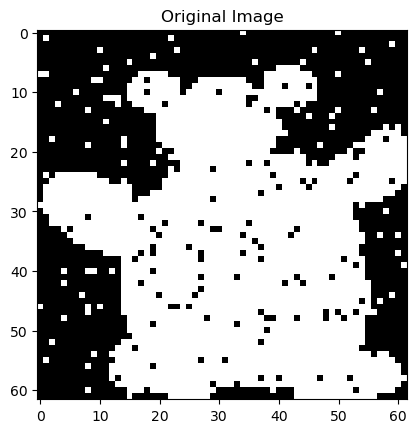

In [3]:
plt.imshow(img, cmap='gray')
plt.title("Original Image")

#### b)

In [4]:
def gibbs_(X, iterations, burn_in, save_steps):
    M, N = X.shape
    Y = np.random.choice([-1, 1], size=(M, N))
    saved_images = []
    samples = []

    for iter in range(iterations):
        for i in range(1, M-1): 
            for j in range(1, N-1):
                neighbor_sum = Y[i-1, j] + Y[i+1, j] + Y[i, j-1] + Y[i, j+1]

                # probabilities based on the Ising model
                exp_positive = np.exp(neighbor_sum + X[i, j])
                exp_negative = np.exp(-neighbor_sum - X[i, j])
                prob = exp_positive / (exp_positive + exp_negative)

                Y[i, j] = 1 if np.random.rand() < prob else -1
                
        if iter in save_steps:
            saved_images.append(Y.copy())
                
        if iter >= burn_in:
            samples.append(Y.copy())

    return saved_images, samples


In [5]:
def reconstruct_image(samples):
    return np.sign(np.mean(samples, axis=0))

In [6]:
X= img

In [7]:
iterations = 10000
burn_in = 5000
save_steps = [1000, 2000, 3000, 4000, 5000]
saved_images, samples = gibbs_(X, iterations, burn_in, save_steps)

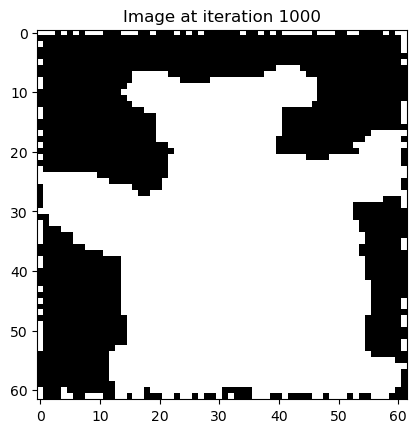

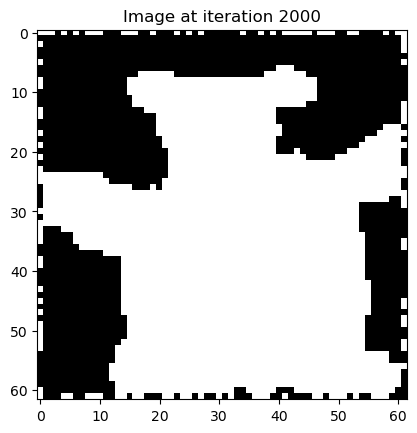

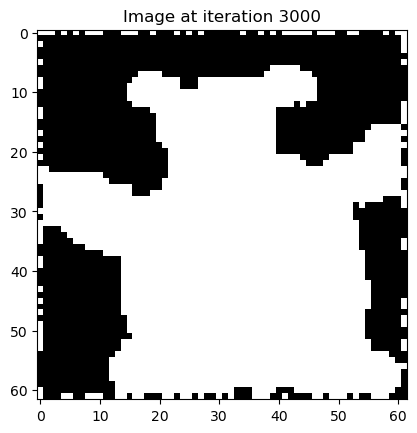

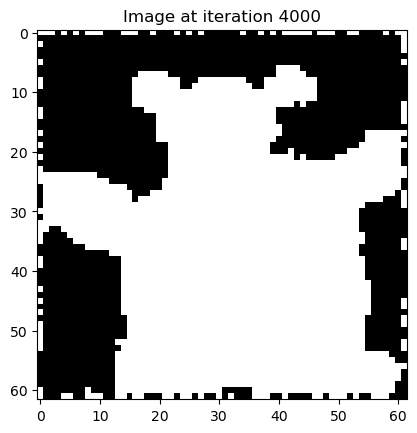

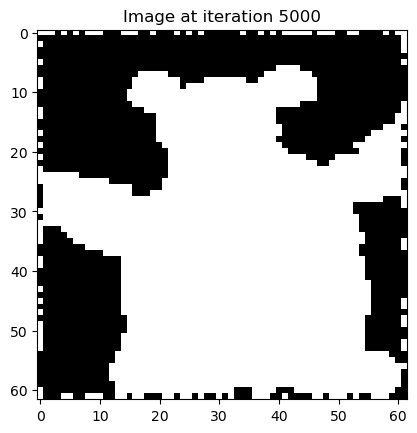

In [8]:
for idx, img in enumerate(saved_images):
    plt.imshow(img, cmap='gray')
    plt.title(f"Image at iteration {save_steps[idx]}")
    plt.show()

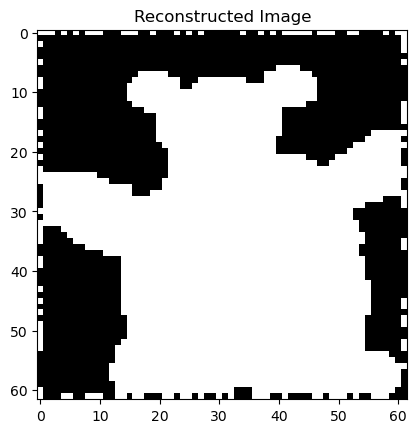

In [9]:
reconstructed_image = reconstruct_image(samples)
plt.imshow(reconstructed_image, cmap='gray')
plt.title("Reconstructed Image")
plt.show()

Text(0.5, 1.0, 'Original Image')

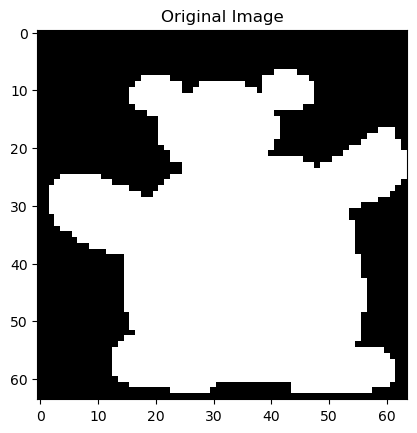

In [10]:
plt.imshow(gt, cmap='gray')
plt.title("Original Image")